<a href="https://colab.research.google.com/github/inefable12/Exploracion_insilico_2024/blob/main/Smarts_2024_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMARTS

In many commonly used applications, such as word processing, we need to search for a particular text string. In cheminformatics, we encounter similar situations where we want to determine whether atoms in a molecule match a particular pattern. There are a number of use cases where this may arise:

• Searching a database of molecules to identify molecules containing a particular substructure

• Aligning a set of molecules on a common substructure to improve visualization

• Highlighting a substructure in a plot


• Constraining a substructure during a calculation

In [1]:
%%capture
!pip install rdkit

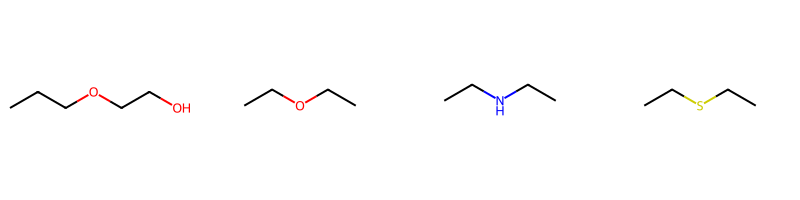

In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
smiles_list = ["CCCOCCO","CCOCC","CCNCC","CCSCC"]
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
MolsToGridImage(mol_list, molsPerRow=4)

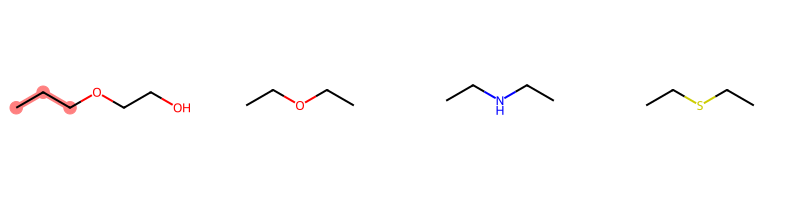

In [18]:
query = Chem.MolFromSmarts("CCC")
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4,highlightAtomLists=match_list)

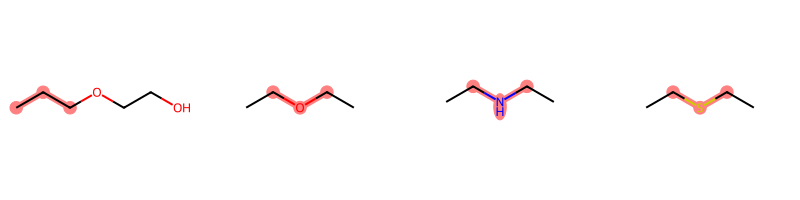

In [19]:
query = Chem.MolFromSmarts("C*C")
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4,highlightAtomLists=match_list)

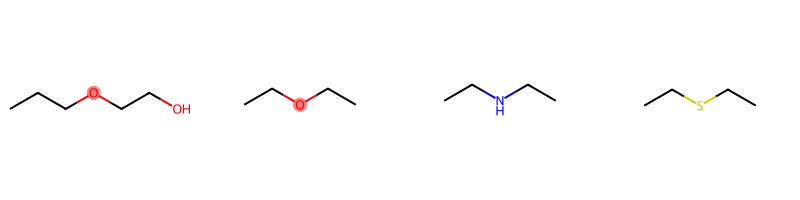

In [20]:
query = Chem.MolFromSmarts("O")
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4,highlightAtomLists=match_list)

# PeruNPDB

In [68]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/inefable12/herramientas_basicas/main/perunpdb1.csv") #, index_col=0)
df.head(3)

,number,smiles
0,1,CC=C1C2C3(C=CC4C3C(O2)OC=C4C(=O)OC)OC1=O
1,2,CC=C1C2C3(C=CC4C3C(O2)OC=C4C(=O)OC)OC1=O
2,3,CC(=O)OCC1=C\2C(CC(C)(O)C3(O)CCC(O3)\C=C2OC1=O...


In [96]:
df['smiles'][136]

'CC(=CC(=O)OC)CCC1C(=C)CCC2C1(CCCC2(C)C(=O)O)C'

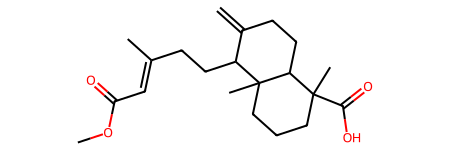

In [97]:
moleculaX = Chem.MolFromSmiles(df['smiles'][136])
moleculaX

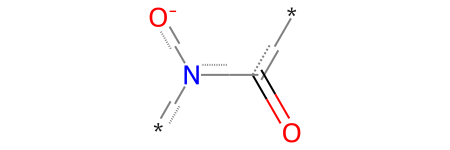

In [98]:
hydroxamate = Chem.MolFromSmarts('*C(=O)N([O-])*')
hydroxamate

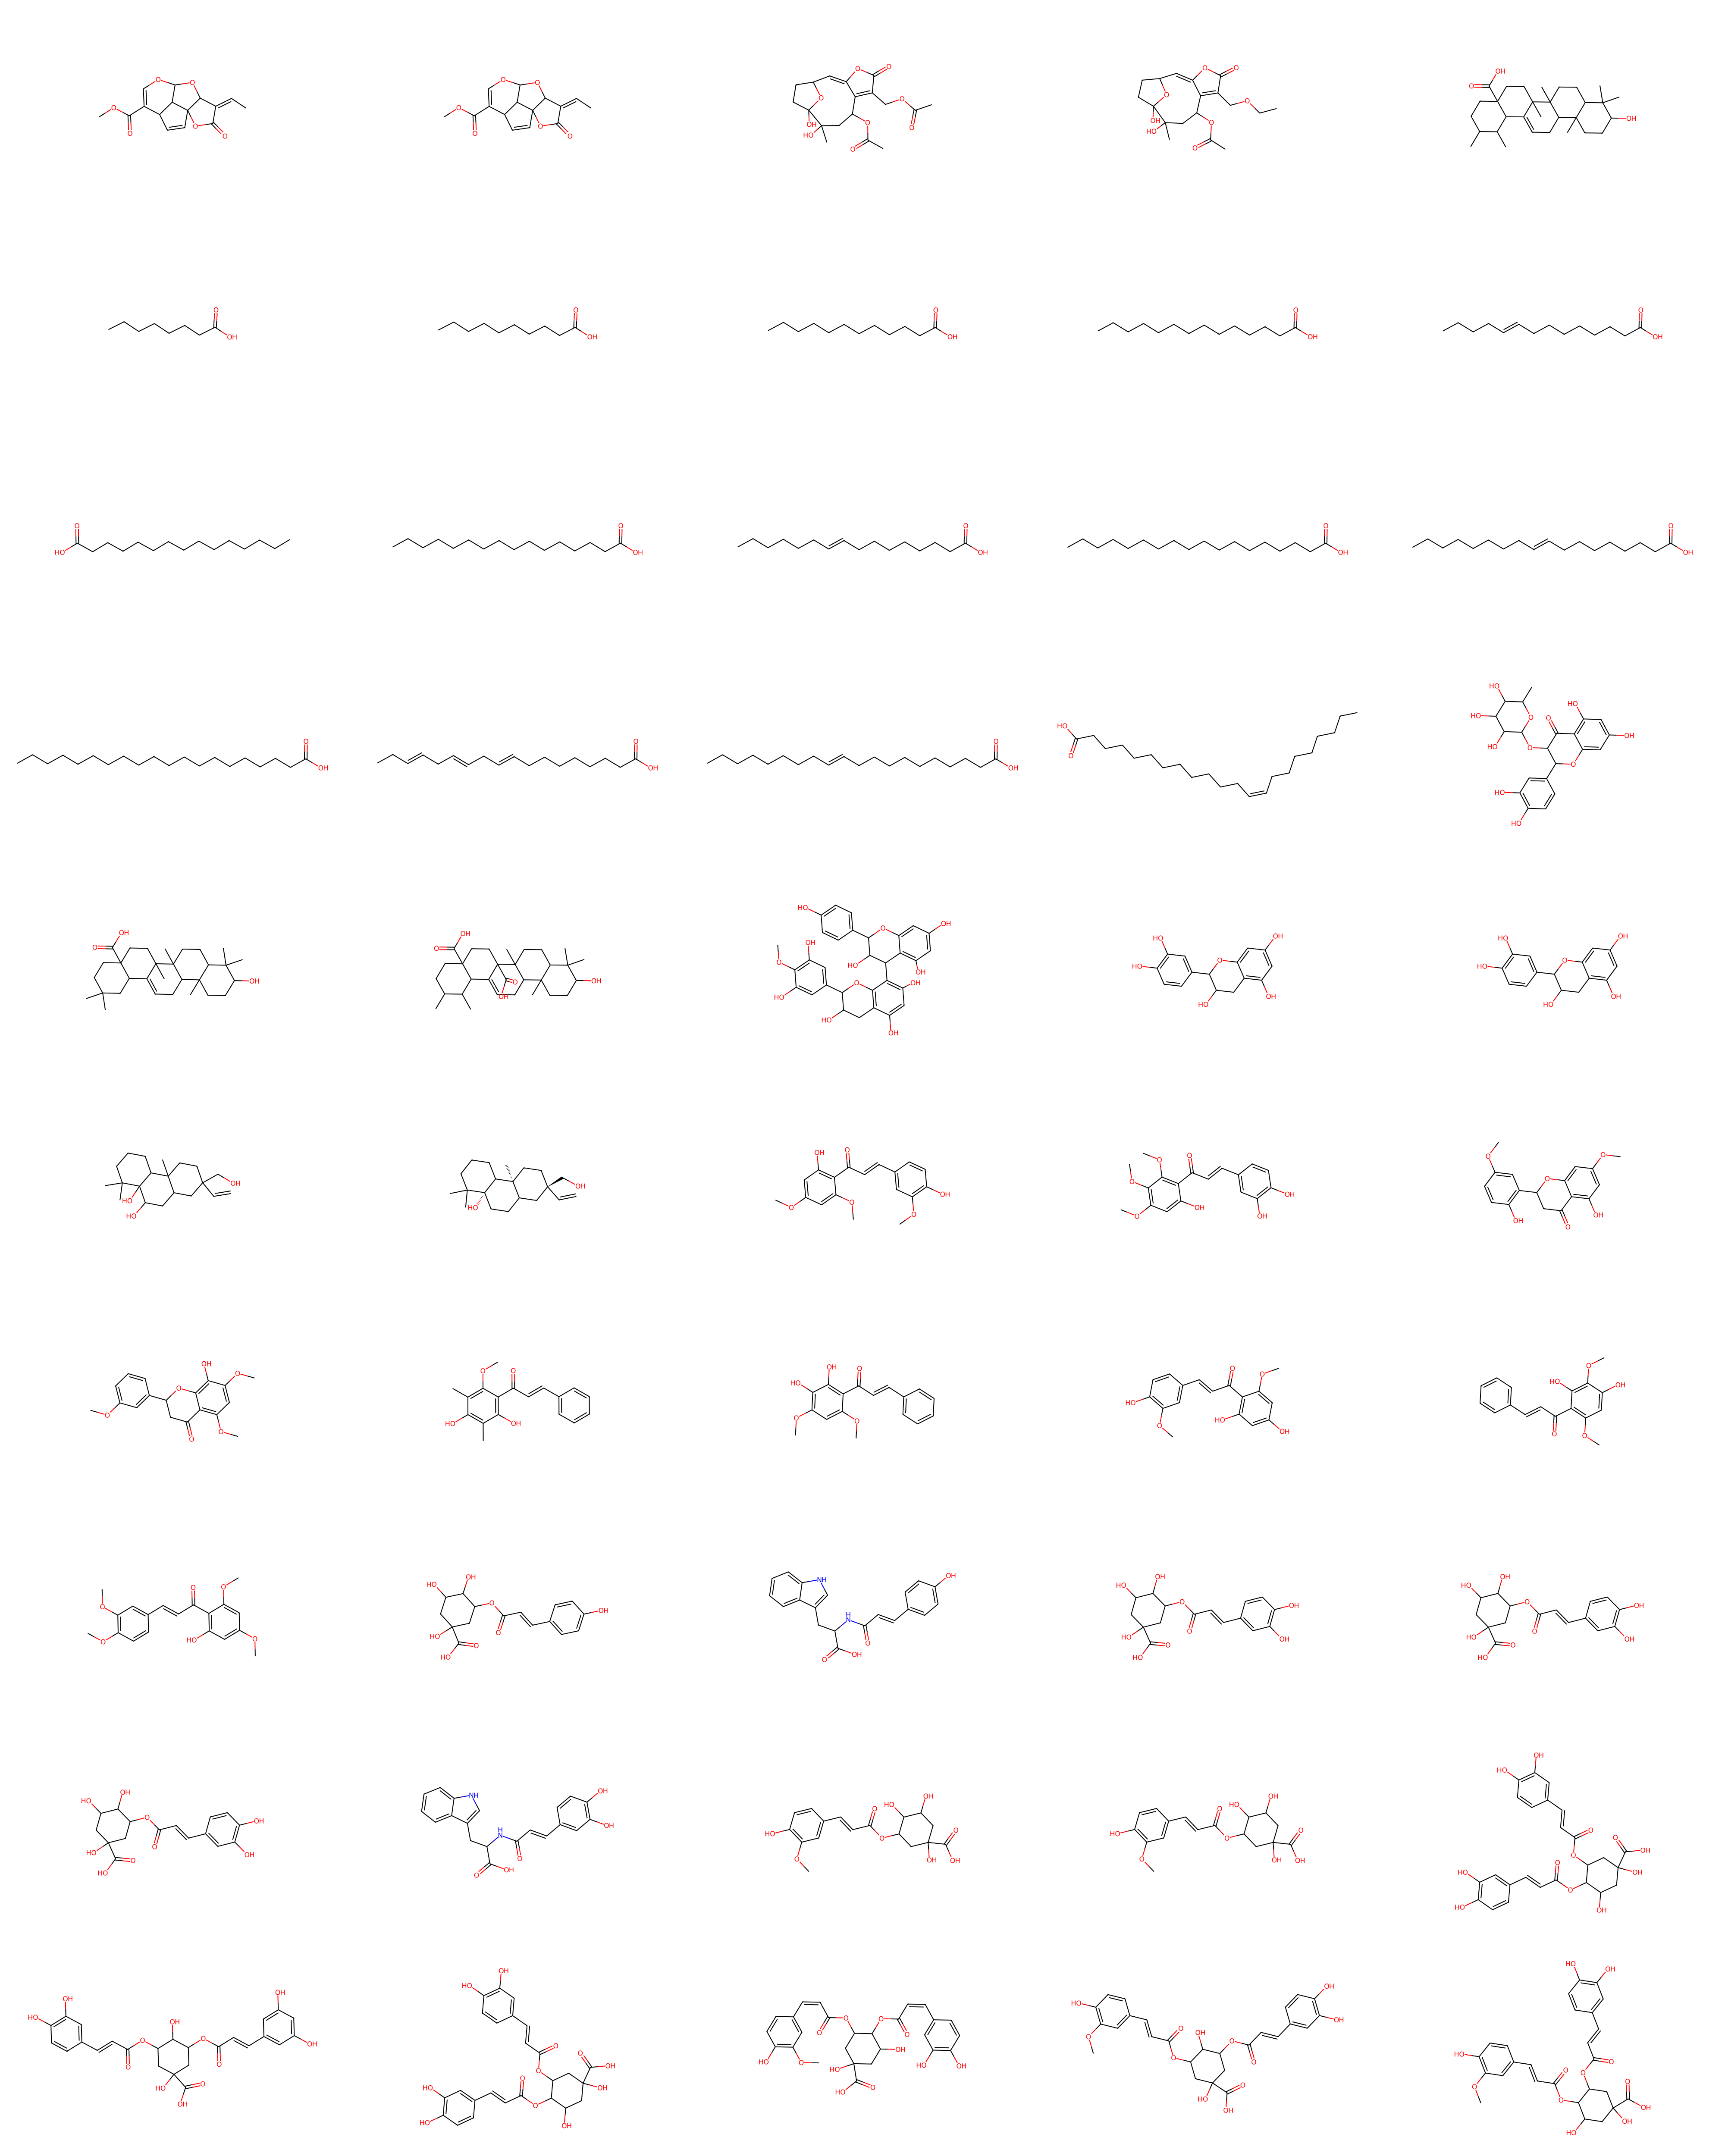

In [100]:
mol_list1 = [Chem.MolFromSmiles(x) for x in df['smiles']]
MolsToGridImage(mol_list1, molsPerRow=5, subImgSize=(800,500))

In [104]:
quelante = Chem.MolFromSmarts('CCCCCCCC') #'O[C,N]CO')
mol_list1[9].GetSubstructMatch(quelante)

(5, 6, 7, 8, 9, 10, 11, 12)

In [77]:
import numpy as np

quelante = Chem.MolFromSmarts('O**O')

for i in range(280):
  try:
    mol_list1[i].GetSubstructMatch(quelante)
  except:
    print(i)

135


In [82]:
#mol_list1[135].GetSubstructMatch(quelante)

In [79]:
import pandas as pd

# se eliminó la 135
df.drop(135, inplace=True)

In [81]:
len(df)

279

In [84]:
mol_list2 = [Chem.MolFromSmiles(x) for x in df['smiles']]

quelante2 = Chem.MolFromSmarts('O**O')
mol_list2[1].GetSubstructMatch(quelante2)

(10, 3, 4, 18)

In [92]:
#identificando a cada átomo que va a coordinar (esto es útil para usarse con MolSimplify)

mol_list2 = [Chem.MolFromSmiles(x) for x in df['smiles']]

quelante2 = Chem.MolFromSmarts('O**O')
mol_list2[1].GetSubstructMatch(quelante2)[3]

18

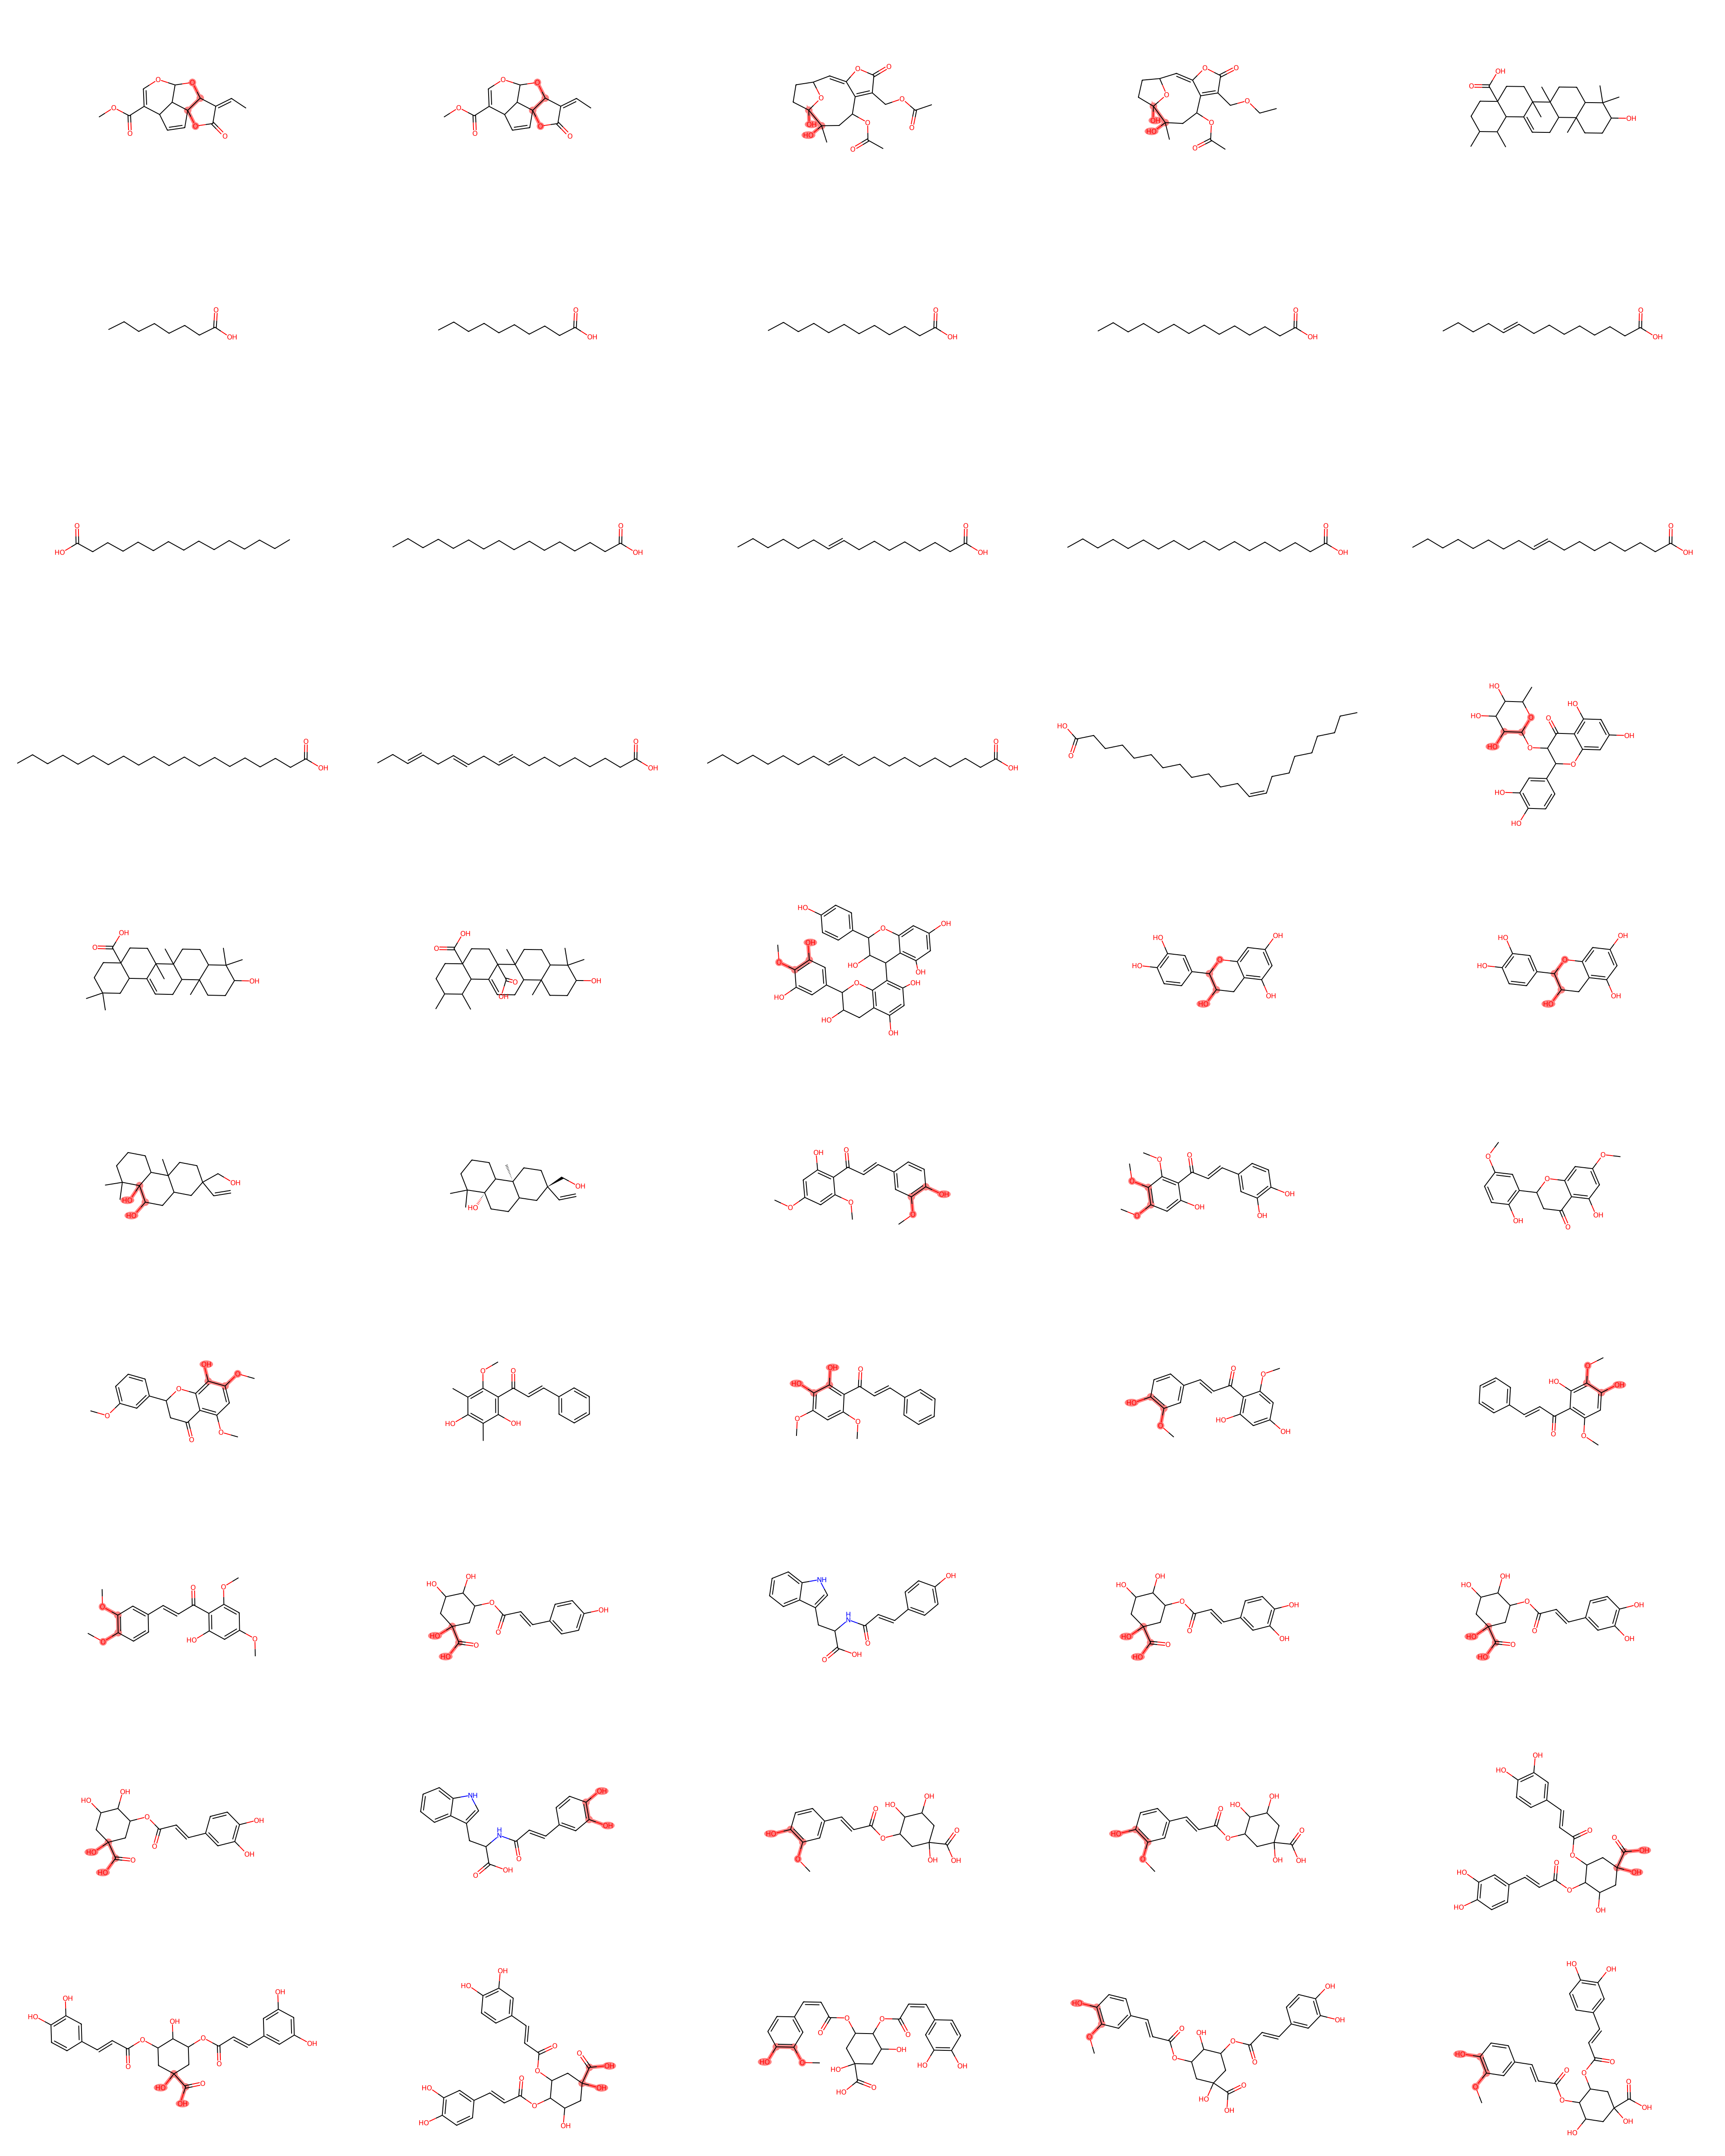

In [107]:
query = Chem.MolFromSmarts("O**O")
match_list = [mol.GetSubstructMatch(query) for mol in mol_list2]
MolsToGridImage(mols=mol_list2, molsPerRow=5,highlightAtomLists=match_list, subImgSize=(800,500))
#MolsToGridImage(mol_list1, molsPerRow=5, subImgSize=(800,500))